In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,6)})
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('amazon_revenue_profit.csv')
df.head()

,Quarter,Revenue,Net Income
0,3/31/2020,75452,2535
1,12/31/2019,87437,3268
2,9/30/2019,69981,2134
3,6/30/2019,63404,2625
4,3/31/2019,59700,3561


In [14]:
df.tail()

,Quarter,Revenue,Net Income
56,3/31/2006,2279,51
57,12/31/2005,2977,199
58,9/30/2005,1858,30
59,6/30/2005,1753,52
60,3/31/2005,1902,78


In [30]:
df.index = pd.to_datetime(df['Quarter'])

In [31]:
df.head()

,Quarter,Revenue,Net Income
Quarter,,,
2020-03-31,3/31/2020,75452,2535
2019-12-31,12/31/2019,87437,3268
2019-09-30,9/30/2019,69981,2134
2019-06-30,6/30/2019,63404,2625
2019-03-31,3/31/2019,59700,3561


<AxesSubplot:xlabel='Quarter'>

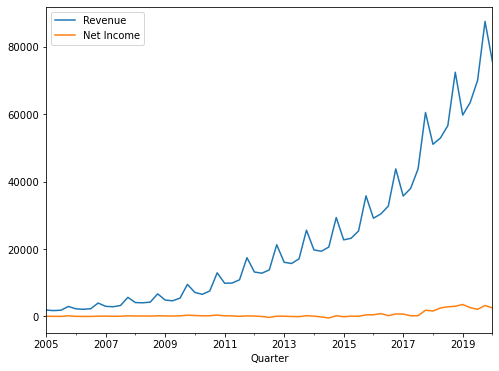

In [32]:
df.plot()

In [33]:
# keeping only datetime and revenue column
df = df.drop(['Net Income','Quarter'],axis=1)

In [38]:
df = df.reset_index()

In [39]:
df.head()

,Quarter,Revenue
0,2020-03-31,75452
1,2019-12-31,87437
2,2019-09-30,69981
3,2019-06-30,63404
4,2019-03-31,59700


In [40]:
## renaming the variables ds and y
df = df[['Quarter','Revenue']].rename({'Quarter':'ds','Revenue':'y'},axis=1)

In [41]:
df.head()

,ds,y
0,2020-03-31,75452
1,2019-12-31,87437
2,2019-09-30,69981
3,2019-06-30,63404
4,2019-03-31,59700


In [42]:
## dividing into train and test
train = df[(df['ds'] >= '2005-03-31') & (df['ds'] <= '2019-03-31')]
test = df[df['ds'] > '2019-03-31']

## Prophet without any Trend and Holiday

In [46]:
from fbprophet import Prophet

In [47]:
model = Prophet(interval_width=0.95)
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future = model.make_future_dataframe(periods=4, freq='Q') # len(test) and also frequency to Quardatic becasue of data

In [61]:
forecast = model.predict(future)

<AxesSubplot:xlabel='ds'>

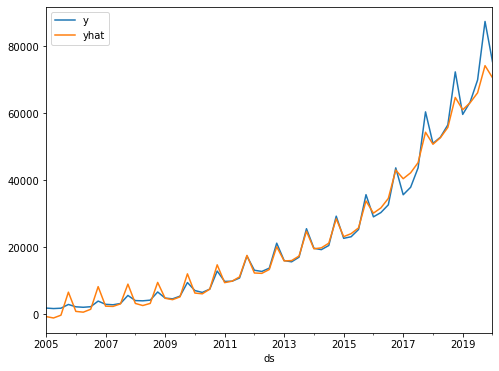

In [62]:
pd.concat([df.set_index('ds')['y'] , forecast.set_index('ds')['yhat']],axis=1).plot()

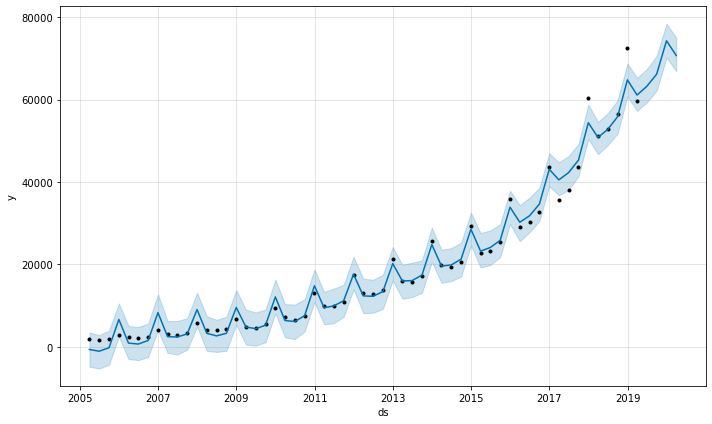

In [63]:
fig1 = model.plot(forecast)

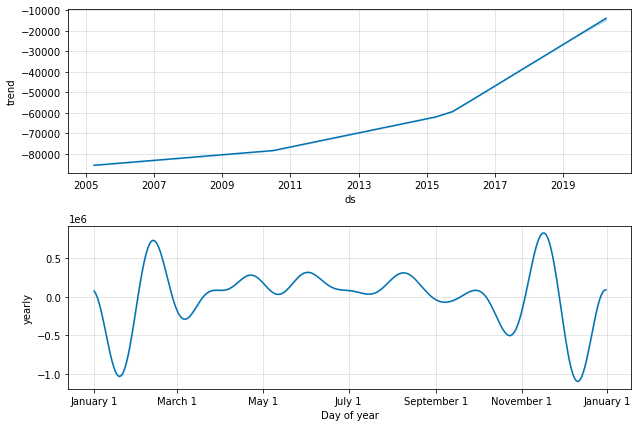

In [64]:
fig2 = model.plot_components(forecast)

## Conclusion:
1. Here we can see data is forecasting prettry good but not getting proper seasonality.


# Prophet With Trend and Holidays
1. Mainly Prophet use Additive model and it is good gor data which is stationary (no trend + no seasonality)
2. But here we need to use the Multiplactive model becasue our data is not stationar (trend+seasonality)

In [68]:
## because we know the sale are pretty high in jan or dec month so we are taking these as holidays
## lower and upper is for sale extend to further
holiday_sale = pd.DataFrame({'holiday':'dec_jan_sale',
                            'ds':pd.to_datetime(['2019-12-31','2018-12-31','2017-12-31','2016-12-31','2015-12-31',
                                                 '2014-12-31','2013-12-31','2012-12-31','2011-12-31','2010-12-31',
                                                '2009-12-31','2008-12-31','2007-12-31','2006-12-31','2005-12-31',]),
                            'lower_window':0,
                            'upper_window':1,
                            })

In [71]:
model = Prophet(interval_width=0.95 , seasonality_mode='multiplicative' , holidays=holiday_sale)
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:
forecaste_multi = model.predict(future)

<AxesSubplot:xlabel='ds'>

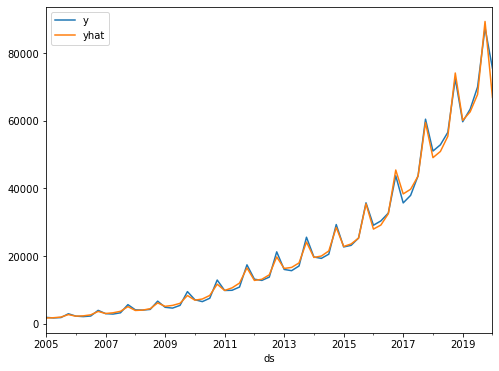

In [73]:
pd.concat([df.set_index('ds')['y'] , forecaste_multi.set_index('ds')['yhat']],axis=1).plot()

In [74]:
# here we can see model is fitted very well

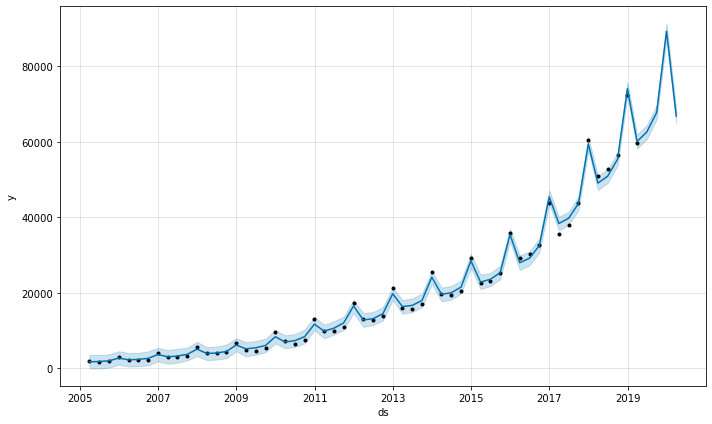

In [76]:
fig11 = model.plot(forecaste_multi)

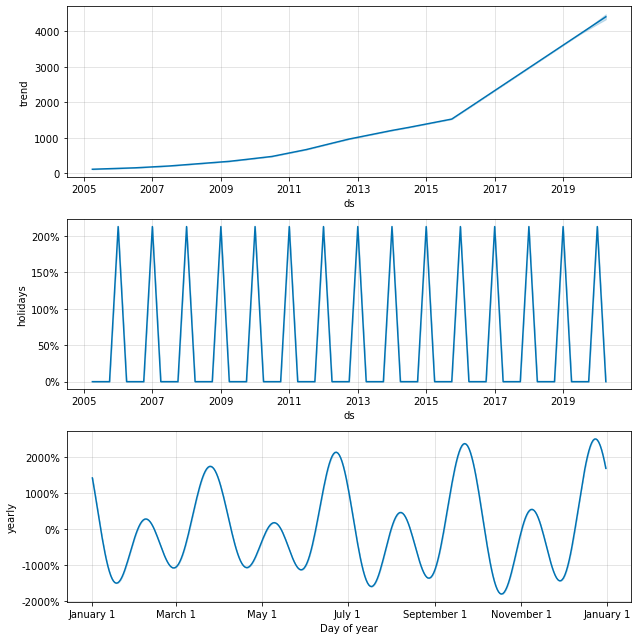

In [77]:
fig12 = model.plot_components(forecaste_multi)